[참고](https://github.com/rickiepark/handson-ml2/blob/master/06_decision_trees.ipynb)

- 분류와 회귀 작업, 다중출력 작업이 가능한 머신러닝 알고리즘.
- 복잡한 데이터셋도 학습 가능.
- 랜덤 포레스트의 기복 구성 요소.

# 6.1 결정 트리 학습과 시각화

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # 꽃잎 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [8]:
import os

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

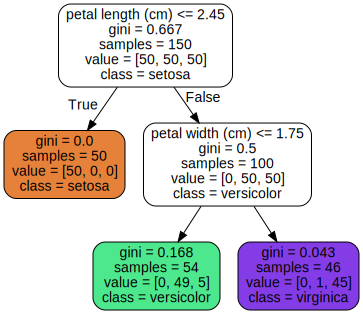

In [15]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

# 6.2 예측하기

결정 트리의 장점 중 하나는 데이터 전처리가 거의 필요하지 않다는 점!

특성의 스케일을 맞추거나 normalize 작업이 없어도 됨.

사이킷런은 T/F 두 개로만 나뉘어지는 **이진 트리**만 만드는 알고리즘을 사용함.

- 화이트박스 모델 : 결정 트리처럼 직관적이고 결정 방식을 이해하기 쉬운 모델. 간단하고 명확한 분류 방법을 사용.
- 블랙박스 모델 : 랜덤 포레스트나 신경망같은 성능이 뛰어나 연산 과정을 쉽게 확인할 수 있으나 왜 그런 예측을 만드는지는 설명하기 어려운 모델.

# 6.3 클래스 확률 추정

결정 트리는 한 샘플이 특정 클래스 $k$에 속할 확률을 추정할 수도 있음.

In [17]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [18]:
tree_clf.predict([[5, 1.5]])

array([1])

# 6.4 CART 훈련 알고리즘

CART : Classification And Regrssion Tree

1. 훈련 세트를 가장 순수한 서브셋으로 나눌 수 있는 하나의 특성 $k$의 임곗값 $t_k$를 사용해 두 개의 서브셋으로 나눈다.
2. CART 알고리즘이 훈련 세트를 성공적으로 둘로 나누었다면 같은 방식으로 서브셋을 또 나눈다.
3. 나눈 서브셋을 또 나누고 이런 식으로 계속 반복.
4. 최대 깊이가 되거나 불순도를 줄이는 분할을 찾을 수 없을 때 멈춘다.

# 6.6 지니 불순도 또는 엔트로피?

- 지니 불순도 : 계산이 조금 더 빠르지만 다른 트리가 만들어지는 경우 빈도 높은 클래스를 한쪽 가지로 고립시키는 경향이 있음.
- 엔트로피 : 계산이 조금 더 느리지만 다른 트리가 만들어지는 경우 균형 잡힌 트리를 만들 수 있음.

# 6.7 규제 매개변수

결정 트리는 훈련 데이터에 대한 제약 사항이 거의 없기 때문에 대부분 과대적합되기 쉬움.
- 비파라미터 모델(nonparameter model) : 훈련되기 전에 파라미터 수가 결정되지 않은 모델. 과대적합되기 쉬움. ex) 결정 트리
- 파라미터 모델(parameter model) : 미리 정의된 파라미터 수를 가지므로 과소적합될 위험이 커짐. ex) 선형 모델

결정 트리는 보통 최대 깊이로 제어한다. 사이킷런에서는 max_depth 매개변수로 조절.

DecisionTreeClassifier에서 결정 트리의 형태를 제한하는 매개변수
- min_samples_split : 분할되기 위해 노드가 가져야 하는 최고 샘플 수
- min_samples_leaf : 리프 노드가 가지고 있어야 할 최소 샘플 수
- min_weight_fraction_leaf : 위 항목과 같으나 가중치가 부여된 전체 샘플 수에서의 비율
- max_leaf_nodes : 리프 노드의 최대 수
- max_features : 각 노드에서 분할에 사용할 특성의 최대 수

min_으로 시작하는 매개변수를 증가시키거나 max_로 시작하는 매개변수를 감소시키면 모델에 규제가 커짐.

# 6.8 회귀

In [25]:
import numpy as np

In [26]:
# 2차식으로 만든 데이터셋 + 잡음
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [27]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [28]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

In [29]:
export_graphviz(
        tree_reg1,
        out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

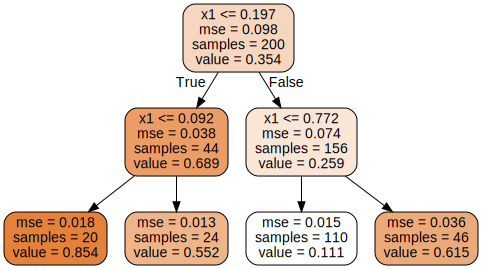

In [30]:
Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

# 6.9 불안정성

결정 트리는 계단 모양의 결정 경계를 만들기 때문의 훈련 세트의 회전에 민감함.

In [36]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [37]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

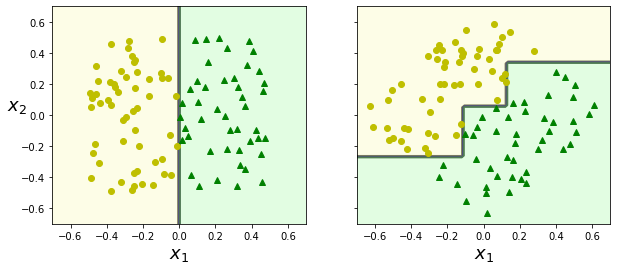

In [39]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

plt.show()

왼쪽 셋은 잘 구분하였지만, 그것을 45도 회전한 오른쪽 셋은 불필요하게 구불구불한 모양임.